### Imports

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.decomposition import PCA
import numpy as np

# https://stackoverflow.com/questions/52285104/3d-scatterplots-with-hue-colormap-and-legend
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

try:
  from google.colab import drive
  drive.mount('/content/drive')

  COLAB = True
except ModuleNotFoundError:
  COLAB = False

%matplotlib inline

# Download Data
To download the data you can go to [this link](https://drive.google.com/file/d/1NjvuEXyX65fQT7K4TFmxo1VGoJVNQwU4/view?usp=drive_link).

If using colab: upload the data to your own google-drive inside a folder called `predictive-analysis`.

# Data Gathering

TODO:
- [x] Create the sections (Bruno)
- [x] Create a structure to download from drive and create the pandas dataframe (Bruno)
- [x] Create a structure to load data in colab or locally in the same way, saving in a variable called `df` (Bruno)
- [x] Define a variable called `CAT_COLUMNS` with the categorical columns (Bruno)
- [x] Define a variable called `NUM_COLUMNS` with the numerical columns (Bruno)
- [x] Define a variable called `TGT` with the tgt column (Bruno)

In [2]:
if COLAB:
  df = pd.read_csv('/content/drive/MyDrive/predictive-analysis/diabetic_data.csv')
else:
  df = pd.read_csv("diabetic_data.csv")

df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [3]:
CAT_COLUMNS = [
  "encounter_id", "patient_nbr",
  "race", "gender", "age", "weight", "payer_code", "medical_specialty",
  "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin",
  "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
  "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone",
  "acarbose", "miglitol", "troglitazone", "tolazamide",
  "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin",
  "glimepiride-pioglitazone", "metformin-rosiglitazone",
  "metformin-pioglitazone", "change", "diabetesMed", 
]
print(f"num of categorical columns: {len(CAT_COLUMNS)}")

num of categorical columns: 38


In [4]:
NUM_COLUMNS = [
  "admission_type_id", "discharge_disposition_id", "admission_source_id",
  "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",
  "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"
]
print(f"num of numerical columns: {len(NUM_COLUMNS)}")

num of numerical columns: 11


In [5]:
TGT = "readmitted"

# Data Cleaning

TODO:

- [x] Check the shape and the types of each column (Bruno)
- [x] Replace the "?" values for None (Bruno)
- [x] Check TGT columns (Bruno)
- [x] Remove categorical columns with only one value (Bruno)
- [x] Remove categorical columns with the number of values as the number of rows (Bruno)
- [x] Check for outliers in numerical columns (Bruno)


In [6]:
df.shape

(101766, 50)

In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Replace all the "?" in the dataset for `None` values

In [8]:
df = df.replace("?", None)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Tgt variable distribution

In [9]:
df[TGT].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [10]:
df[CAT_COLUMNS].nunique().sort_values()

citoglipton                      1
examide                          1
acetohexamide                    2
metformin-pioglitazone           2
metformin-rosiglitazone          2
glimepiride-pioglitazone         2
glipizide-metformin              2
troglitazone                     2
tolbutamide                      2
change                           2
diabetesMed                      2
max_glu_serum                    3
A1Cresult                        3
gender                           3
tolazamide                       3
glyburide-metformin              4
insulin                          4
miglitol                         4
rosiglitazone                    4
pioglitazone                     4
acarbose                         4
glipizide                        4
metformin                        4
glimepiride                      4
chlorpropamide                   4
glyburide                        4
nateglinide                      4
repaglinide                      4
race                

`encounter_id` has one value for each row, so we can remove it from the dataset

In [11]:
df = df.drop(columns=["encounter_id"], errors="ignore")
CAT_COLUMNS = [c for c in CAT_COLUMNS if c != "encounter_id"]

`citoglipton` and `examide` have only one value, so we can remove them from the dataset

In [12]:
df = df.drop(columns=["citoglipton", "examide"], errors="ignore")
CAT_COLUMNS = [c for c in CAT_COLUMNS if c not in ["citoglipton", "examide"]]

numerical columns

In [13]:
df[NUM_COLUMNS].describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


Finding outliers on the numerical - I suggest that we don't remove them right now, but later in our individual models

In [14]:
Q1 = df[NUM_COLUMNS].quantile(.25)
Q3 = df[NUM_COLUMNS].quantile(.75)
IQR = Q3 - Q1

outliers = (df[NUM_COLUMNS] < (Q1 - 1.5 * IQR)) | (df[NUM_COLUMNS] > (Q3 + 1.5 * IQR))

print("Number of outliers in each numerical column:")
outliers.sum()

Number of outliers in each numerical column:


admission_type_id             341
discharge_disposition_id     9818
admission_source_id          6956
time_in_hospital             2252
num_lab_procedures            143
num_procedures               4954
num_medications              2557
number_outpatient           16739
number_emergency            11383
number_inpatient             7049
number_diagnoses              281
dtype: int64

# EDA

TODO:

- [X] Histogram visualisation of all the numeric columns (Bruno)
- [X] Barplot visualisation of all the categorical columns (Bruno)
- [ ] Bivariate analysis of all numeric cols vs tgt - Boxplot plots
- [ ] Bivariate analysis of all numeric cols vs tgt - Anova analysis to get p-value
- [ ] Bivariate analysis of all categorical cols vs tgt - Mosaic / Stackbar / any other plot you like
- [ ] Bivariate analysis of all categorical cols vs tgt - chi-squared test
- [ ] Cluster Analysis to find any pattern within the data
- [X] Running PCA to understand what is the least amount of variables that we can explain the variance (Parsa)
- [X] Get the first two PCs and create a plot with them and get an interpration of it (Parsa / Bruno)

## Univariate plots

### Univariates

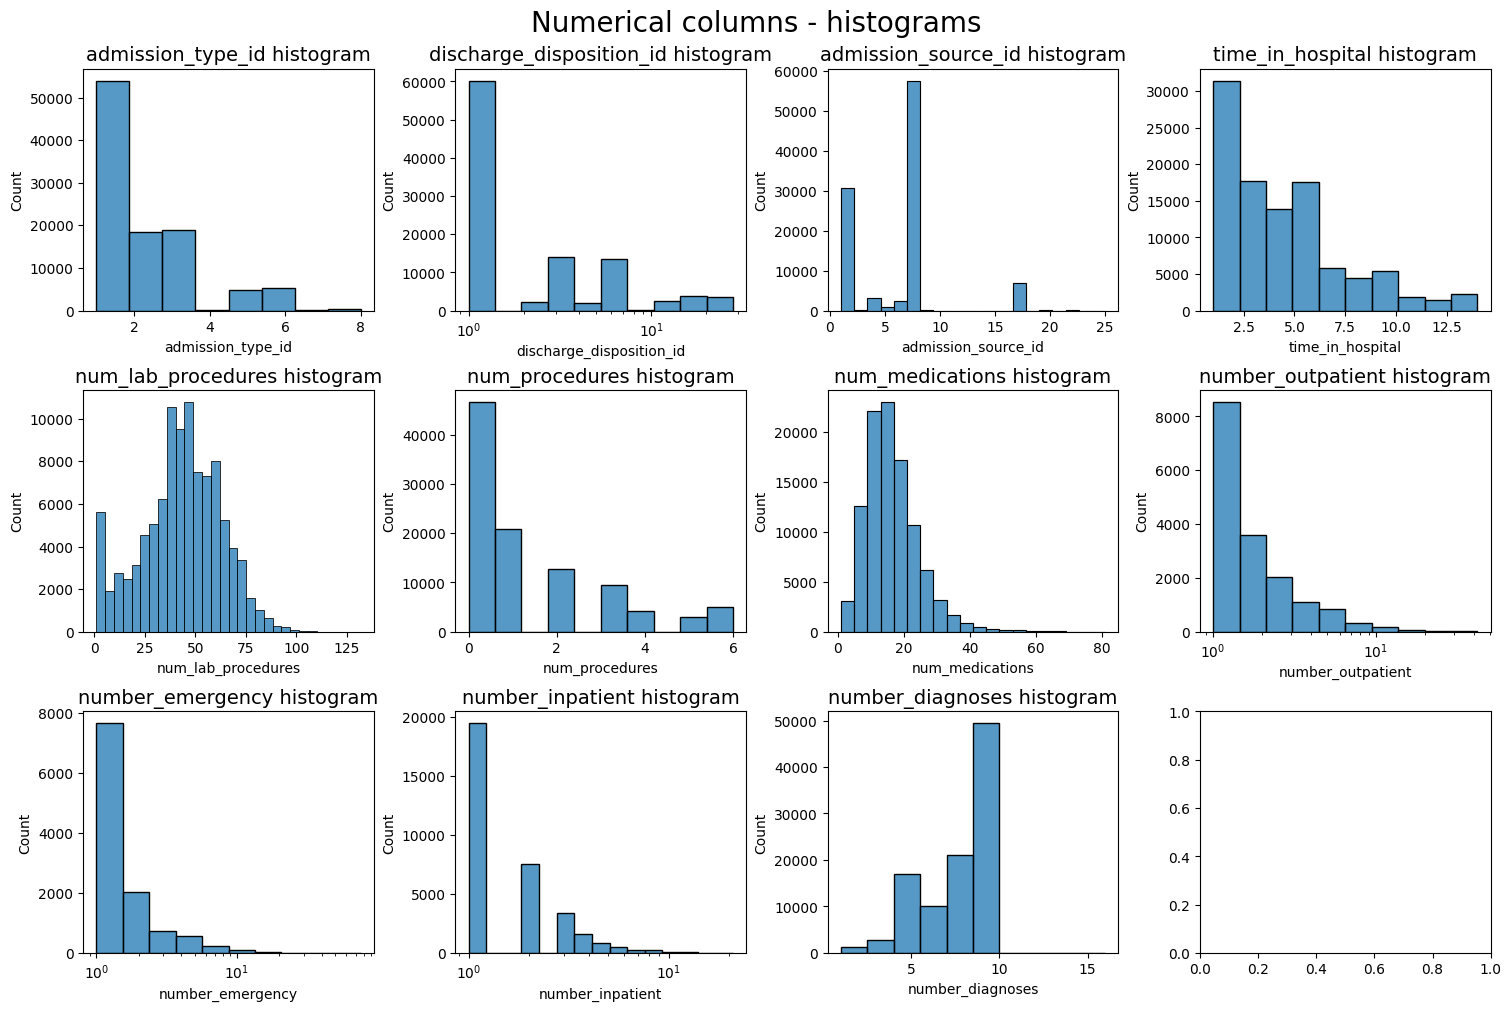

In [15]:
num_cols = 4

fig, axes = plt.subplots((len(NUM_COLUMNS) // num_cols) + 1, num_cols, figsize=(15, 10), constrained_layout=True)

fig.suptitle("Numerical columns - histograms", fontsize=20)

plot_nums = {
  'admission_type_id' : { "bins": 8 },
  'discharge_disposition_id' : { "bins": 10, "log_scale": (True, False) },
  'admission_source_id' : { "bins": 20 },
  'time_in_hospital' : { "bins": 10 },
  'num_lab_procedures' : { "bins": 30 },
  'num_procedures' : { "bins": 10 },
  'num_medications' : { "bins": 20 },
  'number_outpatient' : { "bins": 10, "log_scale": (True, False) },
  'number_emergency' : { "bins": 10, "log_scale": (True, False) },
  'number_inpatient' : { "bins": 15, "log_scale": (True, False) },
  'number_diagnoses' : { "bins": 10 }
}

for i, (col, kwargs) in enumerate(plot_nums.items()):
  ax=axes[i // num_cols, i % num_cols]
  ax.set_title(f"{col} histogram", fontsize=14)

  sns.histplot(df[col],
               bins=kwargs["bins"],
               ax=ax,
               log_scale=kwargs.get("log_scale", (False, False)))

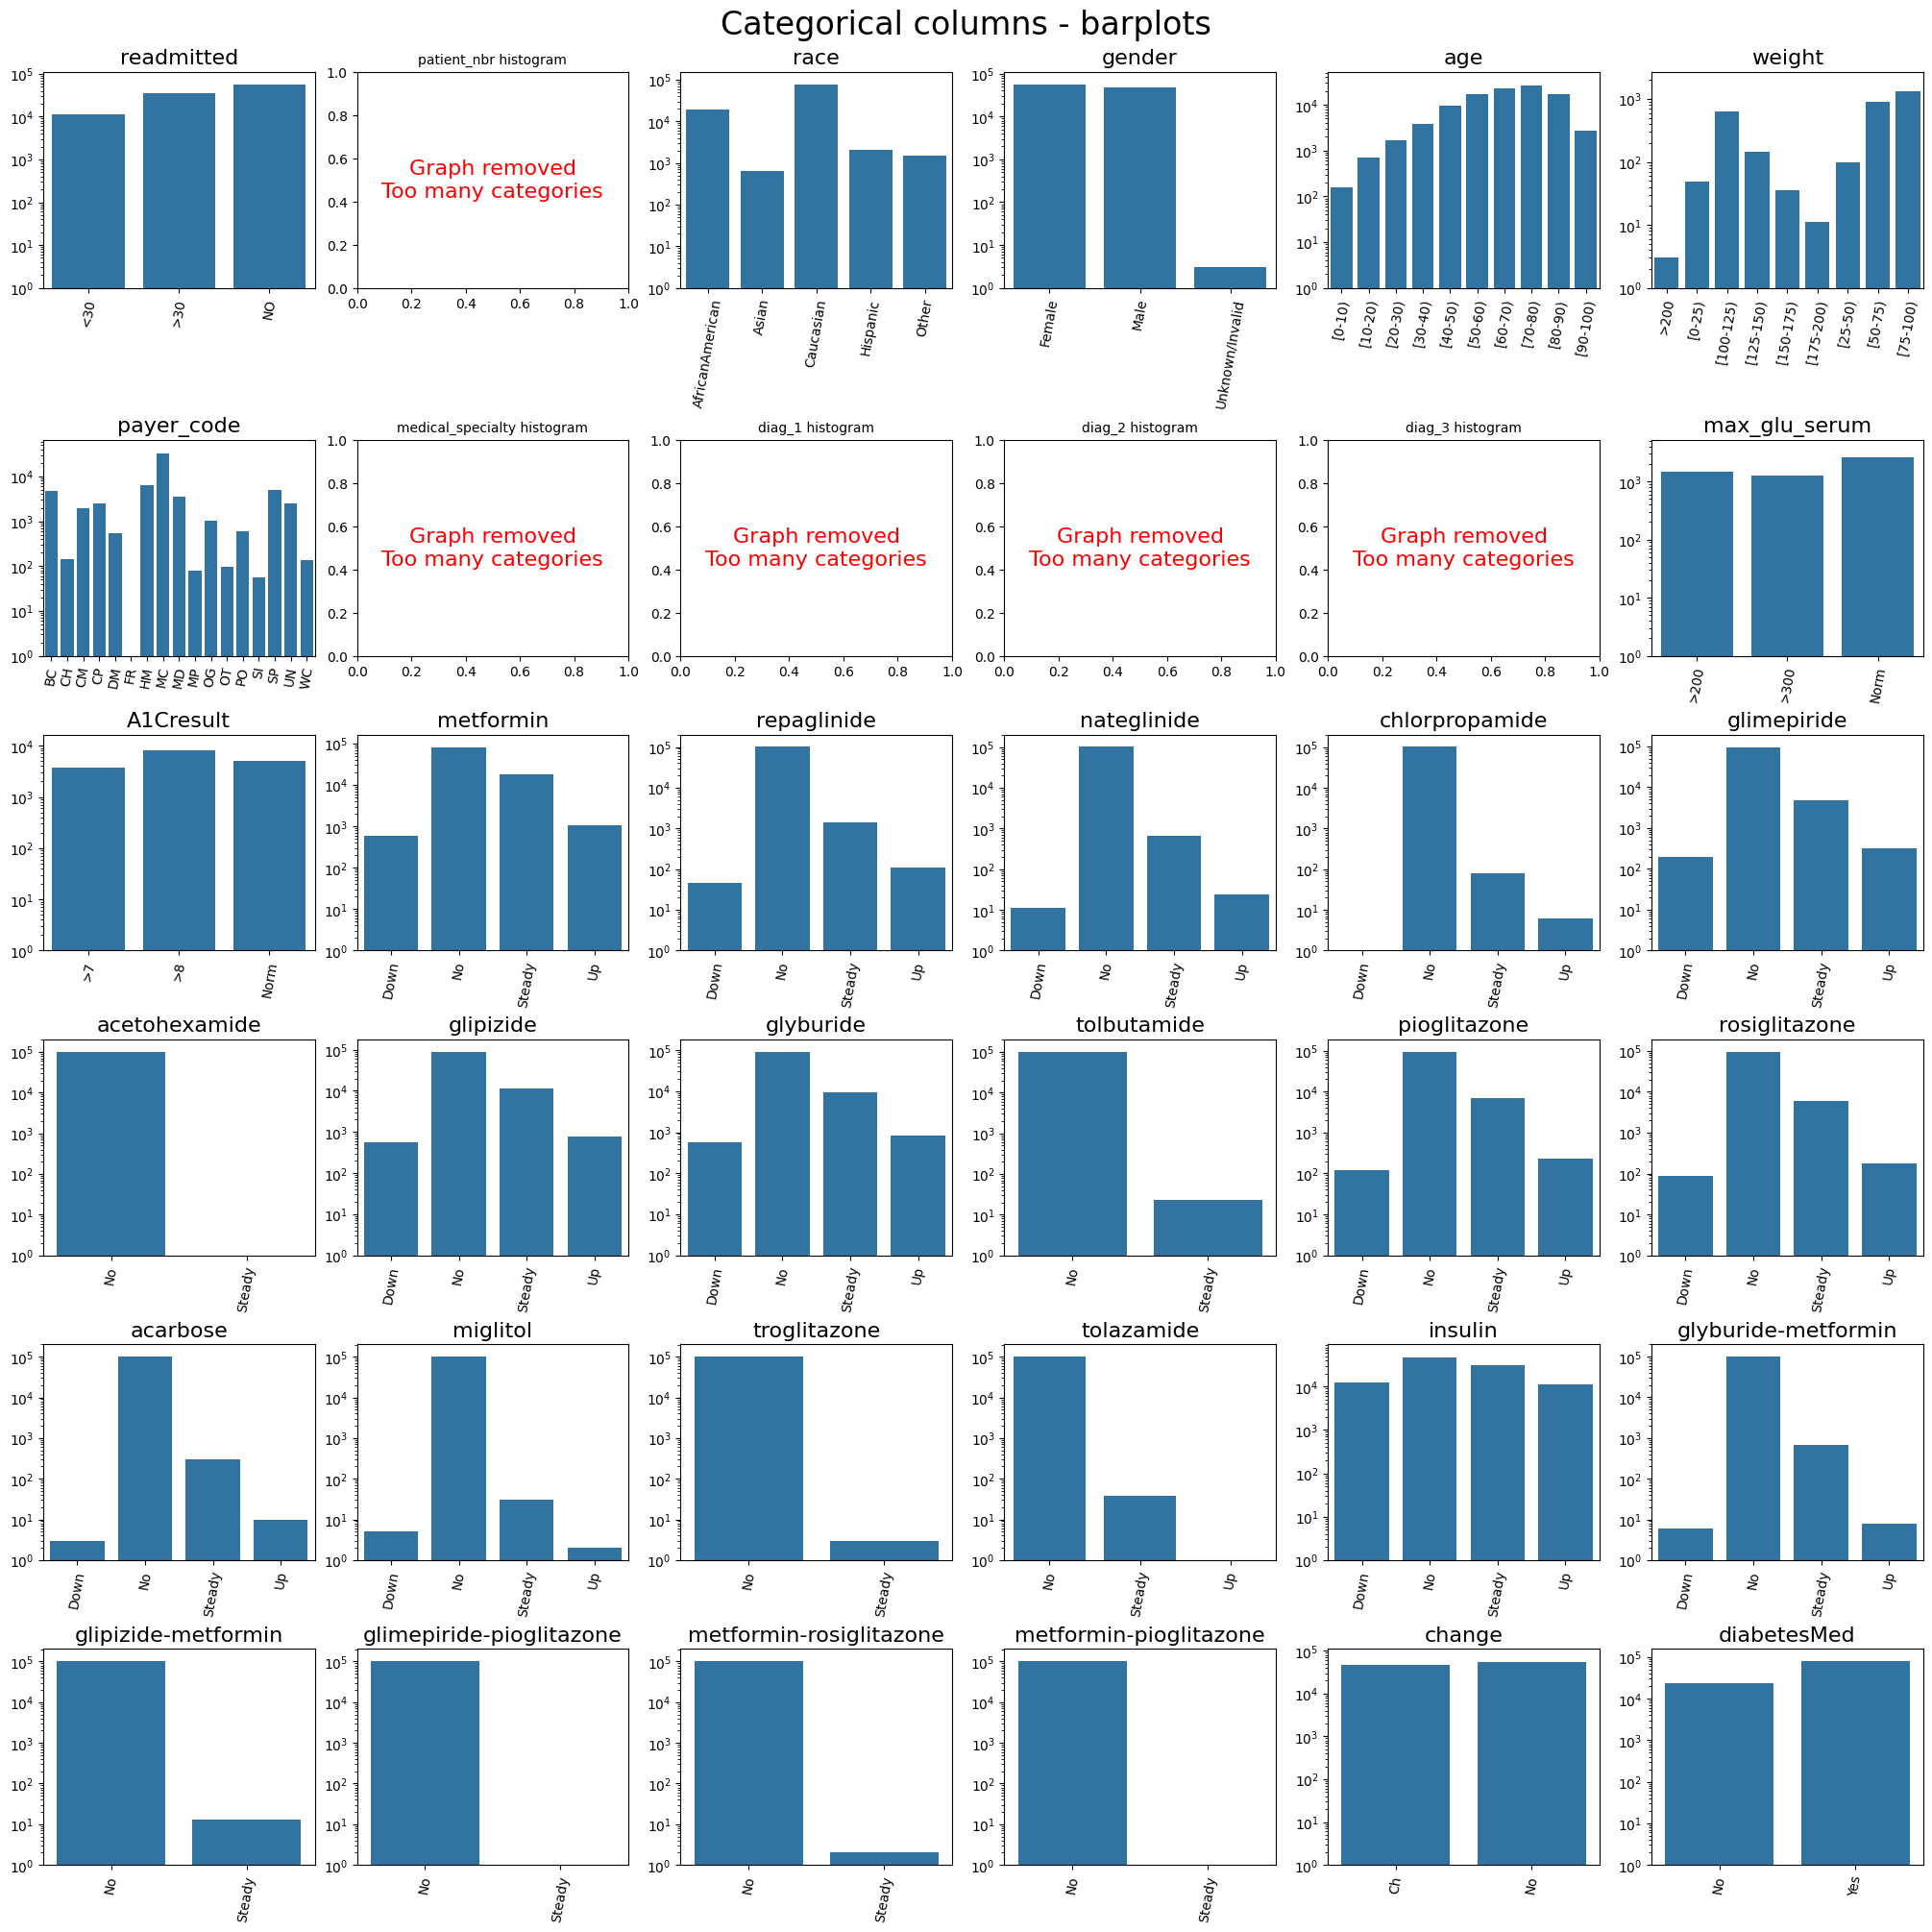

In [64]:
num_cols = 6

cols = [TGT] + CAT_COLUMNS

fig, axes = plt.subplots(len(cols) // num_cols, num_cols, figsize=(20, 20), constrained_layout=True)

fig.suptitle("Categorical columns - barplots", fontsize=24)

CAT_MANY_CATEGORIES = []

for i, col in enumerate(cols):
  ax=axes[i // num_cols, i % num_cols]
  ax.set_title(f"{col} histogram", fontsize=10)

  freq_table = df[col].value_counts().sort_index()
  
  x=freq_table.index.tolist()
  y=freq_table.values

  if freq_table.shape[0] > 20:
    ax.text(0.5,
            0.5,
            "Graph removed\nToo many categories",
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=16,
            color='red')
    CAT_MANY_CATEGORIES.append(col)
    continue

  #df[col].value_counts().sort_values().plot(kind="bar", ax=ax, rot=45, xlabel=None)
  p = sns.barplot(x=x, y=y, ax=ax)
  p.set_title(f"{col}", fontsize=16)
  p.set_xticks(x)
  p.set_xticklabels(x, rotation=80)
  p.set_xlabel(None)
  p.set_yscale("log")
  p.set_ylim(bottom=1, top=max(y) * 2)

### PCA - Standardized

In [17]:
x = df[NUM_COLUMNS]
x = preproc.StandardScaler().fit_transform(x)

display(x.shape)

for func in [np.mean, np.std, np.max, np.min]:
  # print the name of the function
  print(f"{func.__name__}:", func(x, axis = 0))

(101766, 11)

mean: [-1.07245410e-16 -2.23427938e-18  7.37312196e-17  5.08298559e-17
  1.11155399e-16 -1.71760227e-17 -1.32381053e-16  2.01085144e-17
  3.04420566e-17 -2.11558329e-17  1.98850865e-16]
std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
max: [ 4.13450367  4.5991887   4.73554998  3.21732449  4.51881462  2.73201634
  7.99482568 32.85093822 81.4667334  16.12568384  4.43599231]
min: [-0.70846069 -0.5143125  -1.16987339 -1.13764856 -2.1396296  -0.78539774
 -1.84826769 -0.29146149 -0.21262018 -0.50327619 -3.3215959 ]


In [18]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_numericals = pd.DataFrame(x, columns=feat_cols)
normalised_numericals.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [19]:
pca_readmit = PCA(n_components=11)
principalComponents_readmit = pca_readmit.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca_readmit.explained_variance_ratio_))

Explained variation per principal component: [0.18746285 0.12986915 0.10957258 0.09981255 0.08888286 0.08577301
 0.0754504  0.06658379 0.05875353 0.0554621  0.04237719]


In [20]:
principal_readmit_df = pd.DataFrame(data = principalComponents_readmit[:,:2]
             , columns = ['principal component 1', 'principal component 2'])
print(f"variance explained: {sum(pca_readmit.explained_variance_ratio_[:2])})")
principal_readmit_df.head()

variance explained: 0.31733200025584896)


,principal component 1,principal component 2
0,-2.473611,-1.989741
1,0.041641,0.352542
2,-0.763562,-0.316704
3,-0.715040,-0.151553
4,-1.861817,-0.047581


<Figure size 640x480 with 0 Axes>

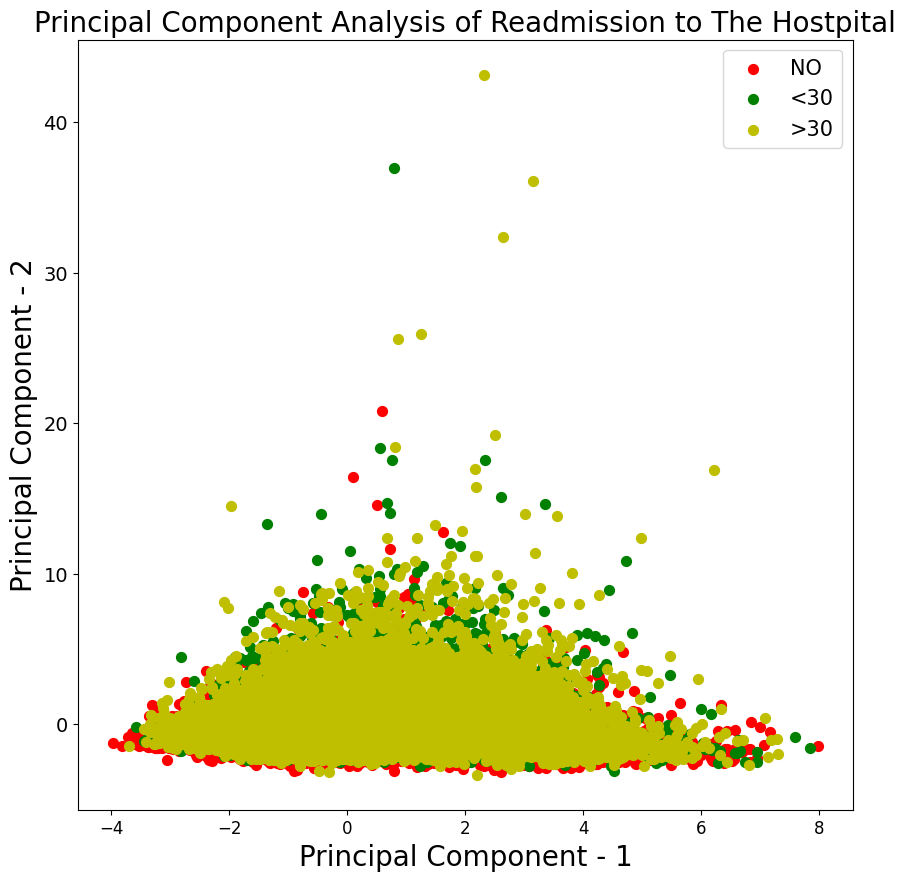

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Readmission to The Hostpital",fontsize=20)
targets = ['NO', '<30','>30']
colors = ['r', 'g','y']
for target, color in zip(targets,colors):
    indicesToKeep = df['readmitted'] == target
    plt.scatter(principal_readmit_df.loc[indicesToKeep, 'principal component 1']
               , principal_readmit_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### PCA - MaxMin + Greedy search for meaning

In [22]:
x = df[NUM_COLUMNS]
x = preproc.MinMaxScaler().fit_transform(x)

display(x.shape)

for func in [np.mean, np.std, np.max, np.min]:
  # print the name of the function
  print(f"{func.__name__}:", func(x, axis = 0))

(101766, 11)

mean: [0.14628658 0.10057932 0.19810153 0.26122976 0.32134077 0.22328839
 0.18777305 0.00879422 0.00260311 0.03026504 0.42817378]
std: [0.2064851  0.19556072 0.16933587 0.22962255 0.15018523 0.28429977
 0.10159408 0.03017283 0.012243   0.06013605 0.12890604]
max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_numericals = pd.DataFrame(x, columns=feat_cols)
normalised_numericals.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,0.714286,0.888889,0.00,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.25,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,0.000000,0.000000,0.25,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333
3,0.000000,0.000000,0.25,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.000000,0.000000,0.25,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667


In [24]:
pca_readmit = PCA(n_components=11)
principalComponents_readmit = pca_readmit.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca_readmit.explained_variance_ratio_))

Explained variation per principal component: [0.30663478 0.18994749 0.1516412  0.11386052 0.09073055 0.06043144
 0.0504674  0.02097079 0.01187637 0.00297723 0.00046222]


In [25]:
pcs = 11
pc_df = pd.DataFrame(data = principalComponents_readmit[:, :pcs],
                     columns = [f"PC{i}" for i in range(1, pcs+1)])
print(f"variance explained: {sum(pca_readmit.explained_variance_ratio_[:pcs])})")

# merge with the target variable
pc_df = pd.concat([pc_df, df], axis = 1)

# print all rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pc_df.head())

variance explained: 0.9999999999999999)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,-0.210215,-0.166783,0.826358,0.581956,-0.263899,0.235552,-0.307610,-0.088963,0.004672,0.002199,0.002479,8222157,Caucasian,Female,[0-10),None,6,25,1,1,None,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,None,None,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,-0.244142,0.077990,-0.147059,-0.056347,0.090171,0.111889,0.092616,0.035996,-0.043451,-0.010236,-0.001608,55629189,Caucasian,Female,[10-20),None,1,1,7,3,None,None,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,0.390928,-0.449991,-0.232729,0.100535,0.167120,-0.230602,-0.092097,-0.008941,0.040380,0.041060,-0.005063,86047875,AfricanAmerican,Female,[20-30),None,1,1,7,2,None,None,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,-0.154553,-0.102748,-0.158773,0.001334,0.097197,0.023068,-0.020810,0.045896,-0.031602,-0.007202,-0.001436,82442376,Caucasian,Male,[30-40),None,1,1,7,2,None,None,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,-0.353682,-0.113753,-0.137710,0.009616,0.071720,0.091169,-0.148560,-0.002238,-0.021366,-0.003520,-0.001101,42519267,Caucasian,Male,[40-50),None,1,1,7,1,None,None,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


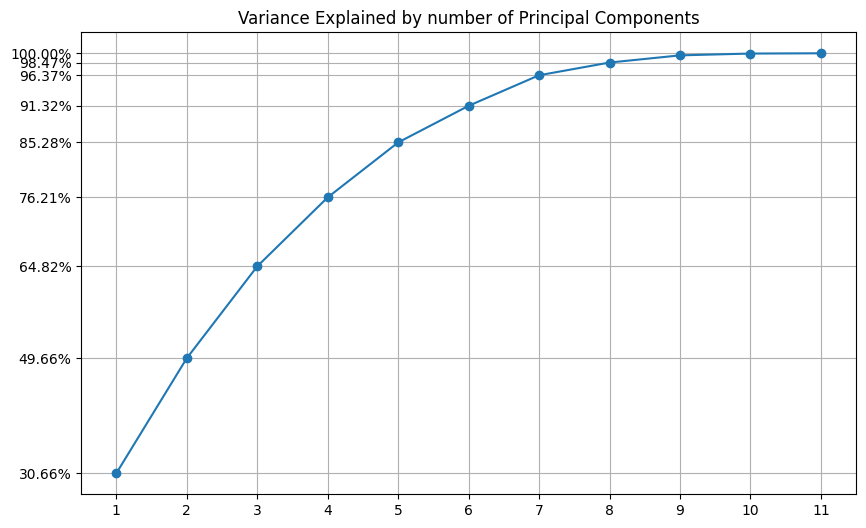

In [26]:
# plot how much variance is explained if we consider different range of principal components

variances = {
    i: sum(pca_readmit.explained_variance_ratio_[:i])
    for i in range(1, pca_readmit.n_components_+1)
}
x = list(variances.keys())
y = list(variances.values())

# plot a line plot based on the variances dictionary
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker = "o")

plt.xticks(x)
plt.yticks(
    y[:8] + [y[-1]],
    [f"{k:.2%}" for k in y[:8] + [y[-1]]],
)

plt.title("Variance Explained by number of Principal Components")

plt.grid(True)

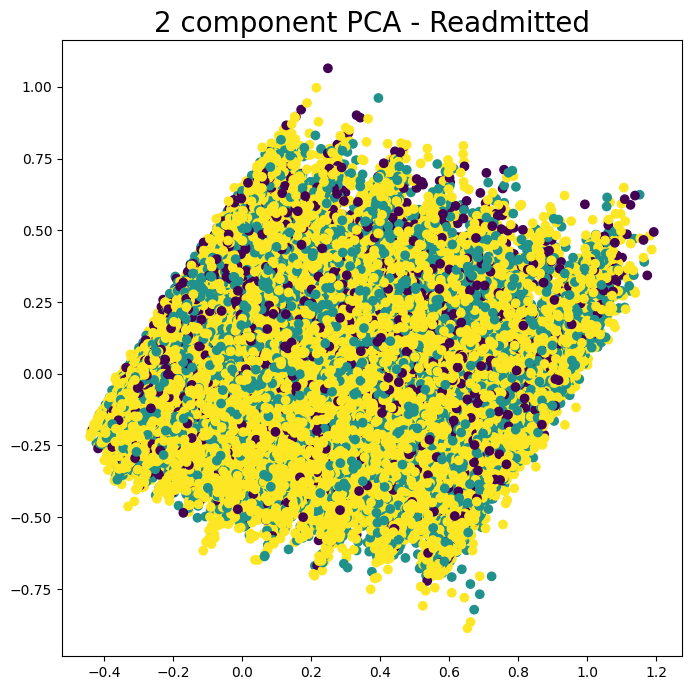

In [27]:
fig = plt.figure(figsize = (8,8))

plt.title('2 component PCA - Readmitted', fontsize = 20)
plt.scatter(
    pc_df['PC1'],
    pc_df['PC2'],
    c=pc_df['readmitted'].astype('category').cat.codes,
    cmap='viridis'
);

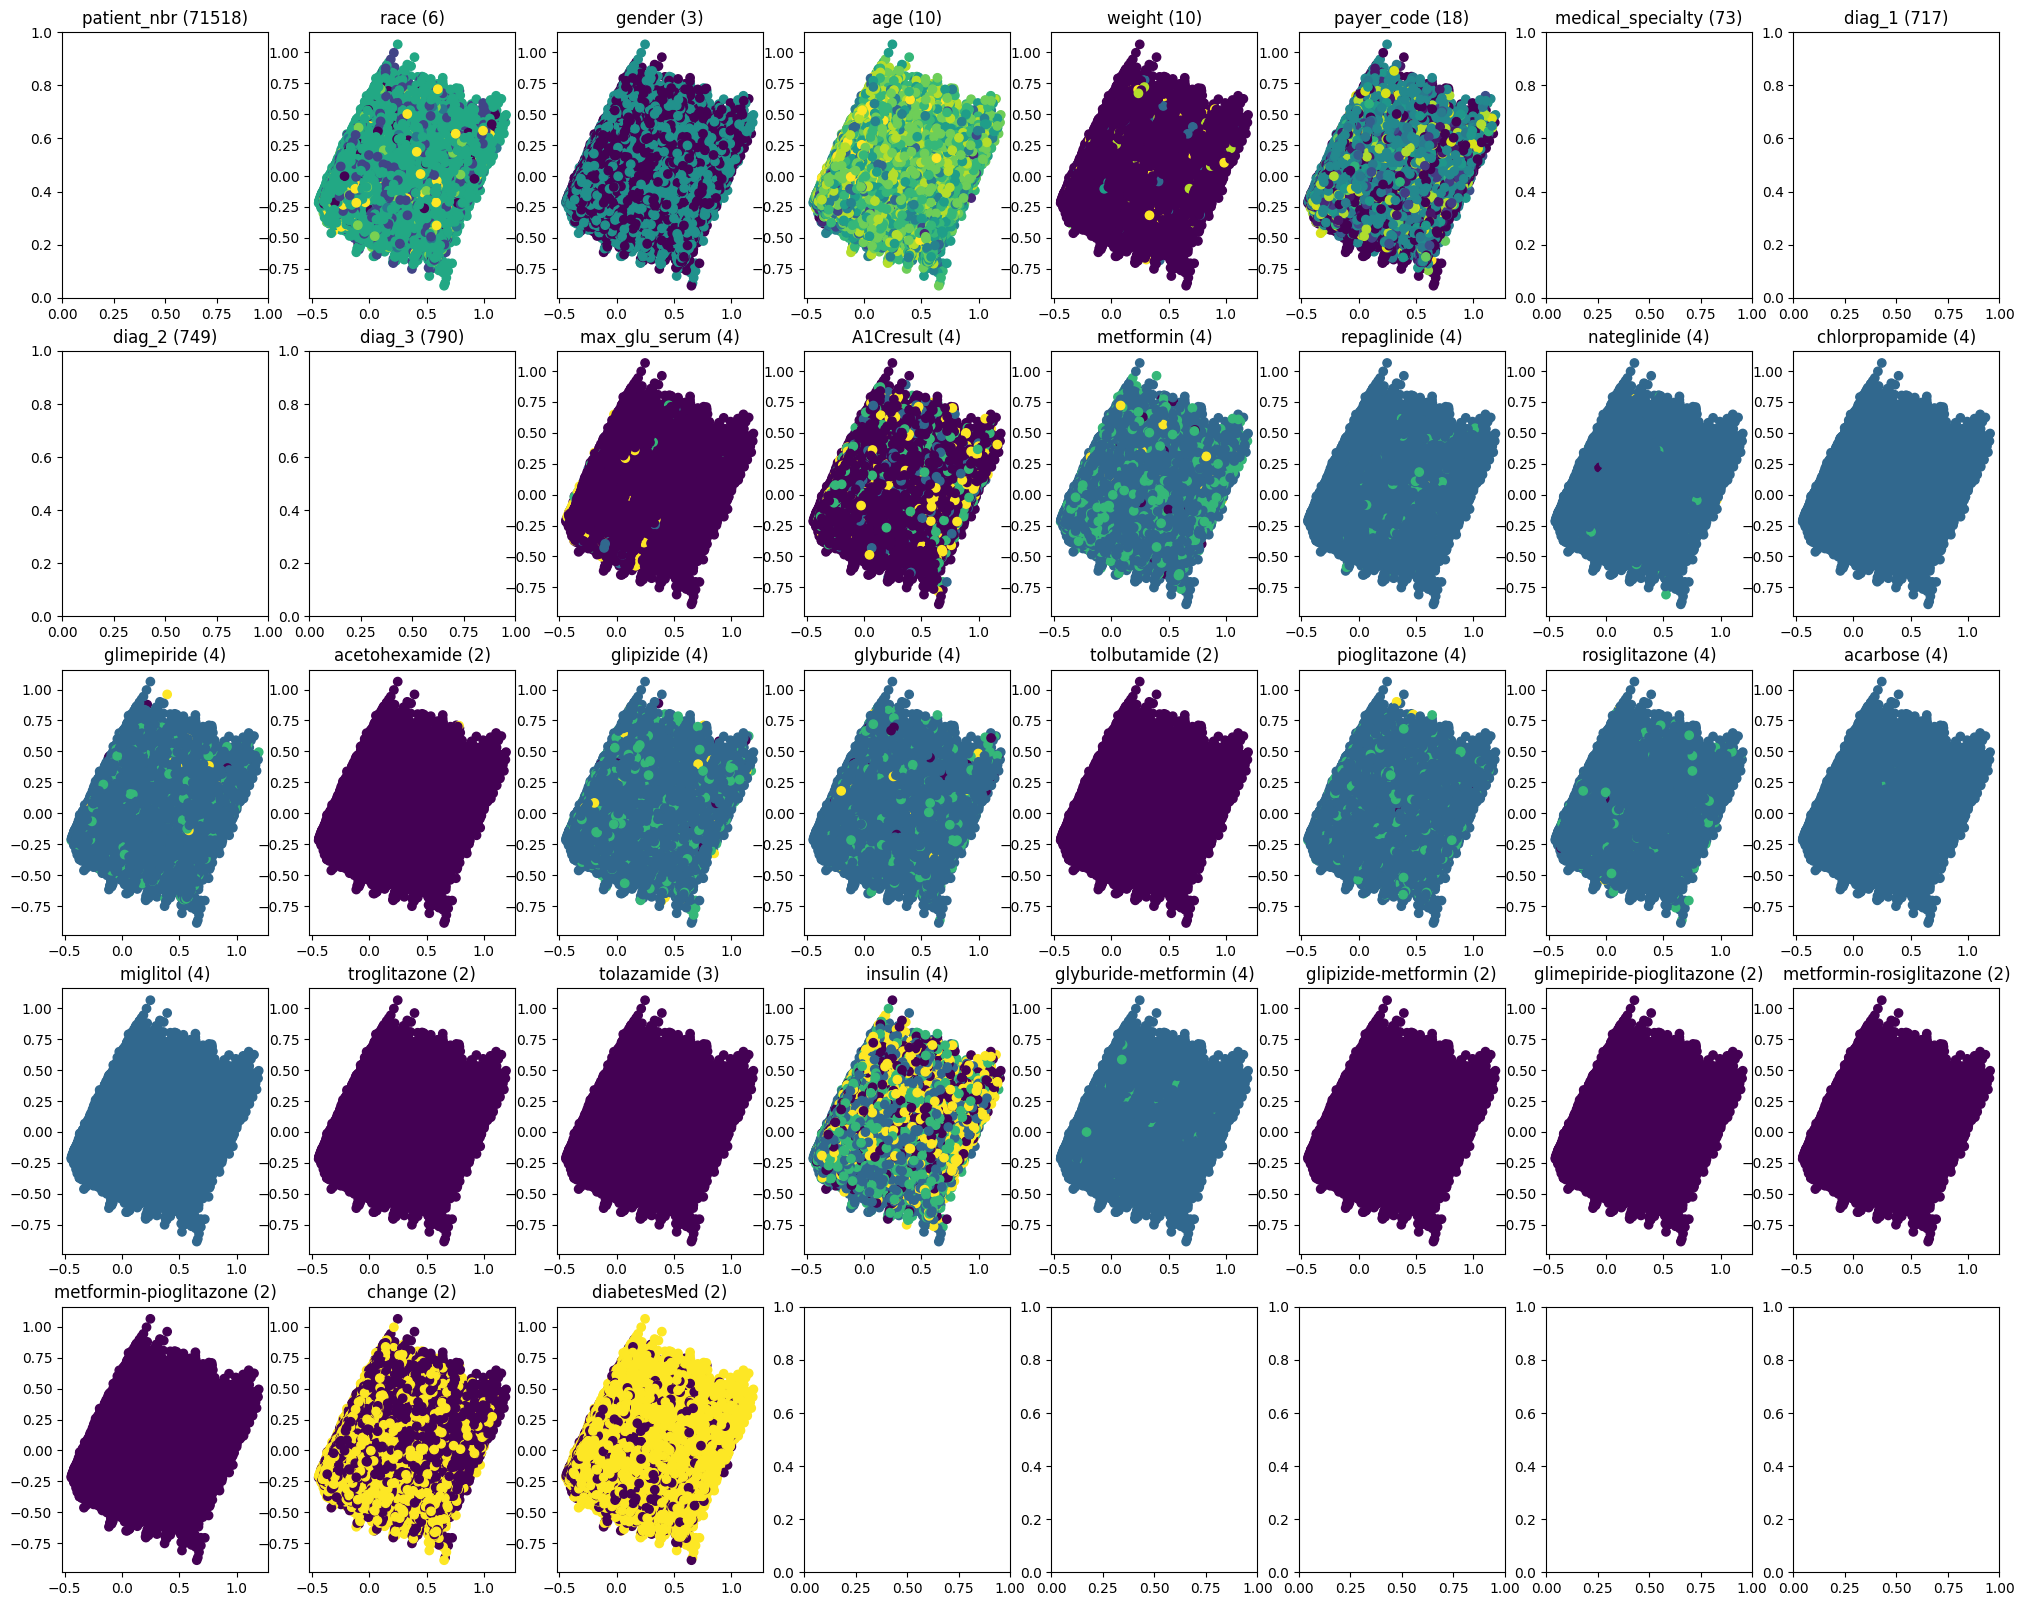

In [28]:
# subplot for each cat column

num_cols = 8
max_unique_vals = 20

features = CAT_COLUMNS

fig, axes = plt.subplots((len(features) // num_cols) + 1, num_cols, figsize=(25, 20))

for i, col in enumerate(features):
    # plot scatter using matplotlib
    unique_vals = pc_df[col].unique()
    ax = axes[i//num_cols, i%num_cols]
    ax.title.set_text(f"{col} ({len(unique_vals)})")
    if len(unique_vals) > max_unique_vals:
        continue

    # create color map using matplotlib
    cmap = mpl.colormaps['viridis'].resampled(len(unique_vals))

    # faster but in layers so did not like that much
    # for j, val in enumerate(unique_vals):
    #     ax.scatter(pc_df.loc[pc_df[col] == val, 'PC1'],
    #                pc_df.loc[pc_df[col] == val, 'PC2'],
    #                label=val,
    #                color=cmap(j))

    # slower but better looking
    ax.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df[col].astype('category').cat.codes, cmap='viridis', label=col)

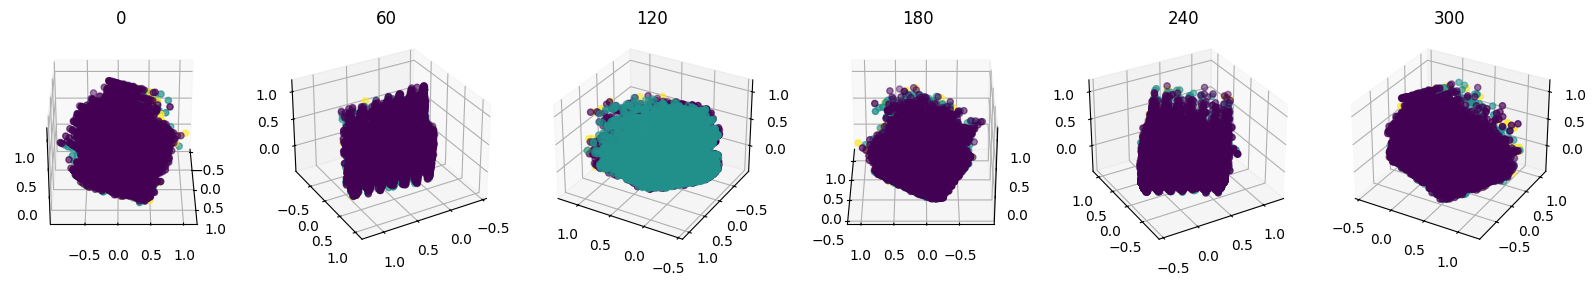

In [29]:
rotations = range(0, 360, 60)

col = TGT

fig, axes = plt.subplots(1, len(rotations), figsize=(20, 6), subplot_kw={'projection': '3d'})

unique_vals = pc_df[col].unique()
cmap = mpl.colormaps['viridis'].resampled(len(unique_vals))

for i, rot in enumerate(rotations):
    ax = axes[i]
    ax.title.set_text(rot)
    ax.view_init(30, rot)

    for j, val in enumerate(unique_vals):
        ax.scatter(pc_df.loc[pc_df[col] == val, 'PC1'],
                   pc_df.loc[pc_df[col] == val, 'PC2'],
                   pc_df.loc[pc_df[col] == val, 'PC3'],
                   label=val,
                   color=cmap(j))

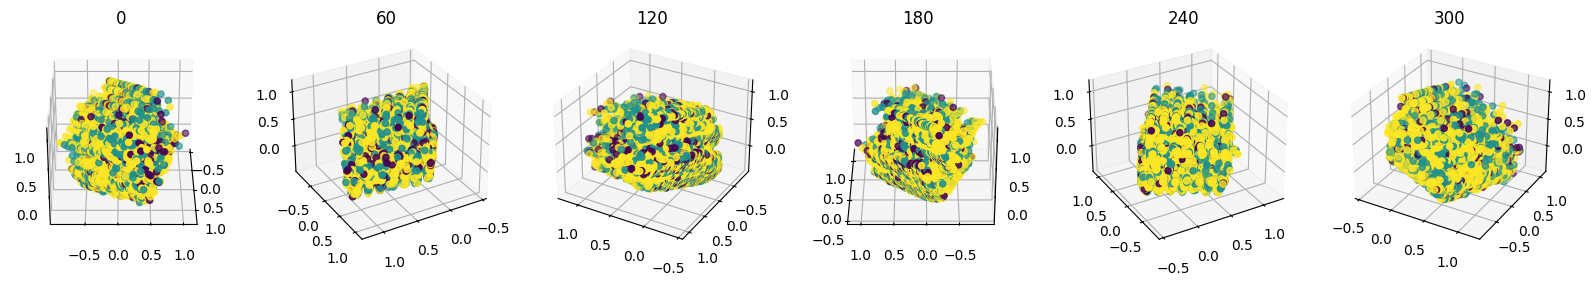

In [30]:
rotations = range(0, 360, 60)

col = TGT
#col = "diabetesMed"

fig, axes = plt.subplots(1, len(rotations), figsize=(20, 6), subplot_kw={'projection': '3d'})

unique_vals = pc_df[col].unique()
cmap = mpl.colormaps['viridis'].resampled(len(unique_vals))

for i, rot in enumerate(rotations):
    ax = axes[i]
    ax.title.set_text(rot)
    ax.view_init(30, rot)
    # https://stackoverflow.com/questions/52285104/3d-scatterplots-with-hue-colormap-and-legend
    ax.scatter(pc_df['PC1'],
               pc_df['PC2'],
               pc_df['PC3'],
               c=pc_df[col].astype('category').cat.codes,
               cmap=cmap)